In [1]:
#Loading Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Loading data
data = pd.read_csv("mall customers.csv")
df=data.copy()

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#Rename the columns anme
df.rename(columns={'Annual Income (k$)': 'income','Spending Score (1-100)':'score'}, inplace=True)

In [6]:
df.isnull().sum() # Checking the NA values

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

In [7]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


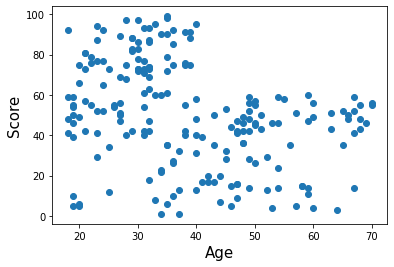

In [8]:
#Ploting for clustering
plt.scatter(df['Age'],df['score'])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.show()

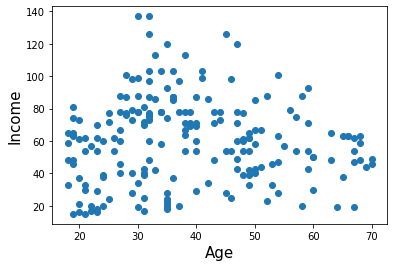

In [9]:
#Ploting for clustering
plt.scatter(df['Age'],df['income'])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.show()

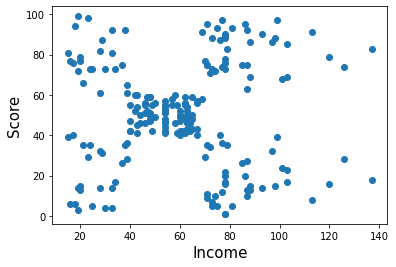

In [10]:
#Ploting for clustering
plt.scatter(df['income'],df['score'])
plt.xlabel("Income",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.show()

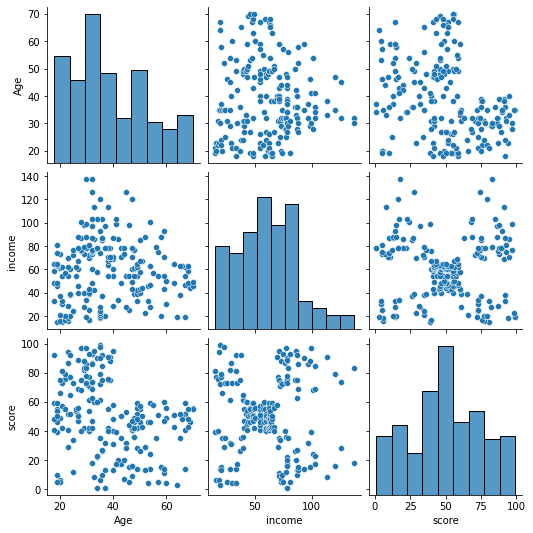

In [11]:
#data visualization using seaborn library 
sns.pairplot(df[['Age','income','score']])
plt.show()

In [12]:
#Remove the columns except score and income
df.columns

Index(['CustomerID', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [13]:
df=df.drop(['CustomerID', 'Gender', 'Age'],axis=1)

In [14]:
#K_means cluster algorithm
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [15]:
kmeans=KMeans()
#fitting the model
df['cluster']=kmeans.fit_predict(df[['income', 'score']])

In [16]:
df.head()

,income,score,cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [17]:
#finding the centers
centers =kmeans.cluster_centers_
centers

array([[ 25.0952381 ,  80.04761905],
       [ 63.72093023,  46.1627907 ],
       [ 78.55172414,  82.17241379],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 47.29545455,  51.40909091],
       [109.7       ,  82.        ]])

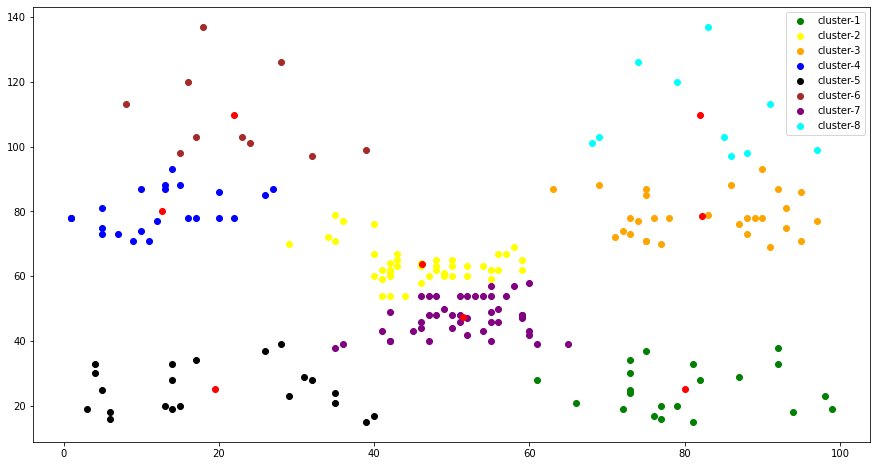

In [18]:
#Visulizing the clustering plot
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 5]
df7 = df[df.cluster == 6]
df8 = df[df.cluster == 7]

plt.figure(figsize=(15,8))

plt.scatter(df1['score'],df1['income'],color='green',label='cluster-1')
plt.scatter(df2['score'],df2['income'],color='yellow',label='cluster-2')
plt.scatter(df3['score'],df3['income'],color='orange',label='cluster-3')
plt.scatter(df4['score'],df4['income'],color='blue',label='cluster-4')
plt.scatter(df5['score'],df5['income'],color='black',label='cluster-5')
plt.scatter(df6['score'],df6['income'],color='brown',label='cluster-6')
plt.scatter(df7['score'],df7['income'],color='purple',label='cluster-7')
plt.scatter(df8['score'],df8['income'],color='cyan',label='cluster-8')

plt.scatter(centers[:,1],centers[:,0], color='red')

plt.legend()
plt.show()

In [19]:
#calculate number of cluster
wcss=[]
clusters=range(1,12)
for k in range(1,12):
  km = KMeans(n_clusters=k)
  km.fit(df[['income','score']]) 
  wcss.append(km.inertia_)

In [20]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25018.576334776328,
 21932.392044240973,
 19636.75396489815,
 17602.190468386776]

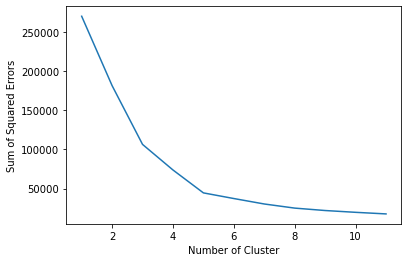

In [21]:
plt.plot(clusters, wcss)
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [22]:
# Finding the optimal number of cluster
!pip install kneed

In [23]:
from kneed import KneeLocator

In [24]:
kneed_locator=KneeLocator(clusters, wcss, curve='convex',direction='decreasing')
optimal_cluster=kneed_locator.knee
print('Optimal Number of Cluster is', optimal_cluster)

Optimal Number of Cluster is 5


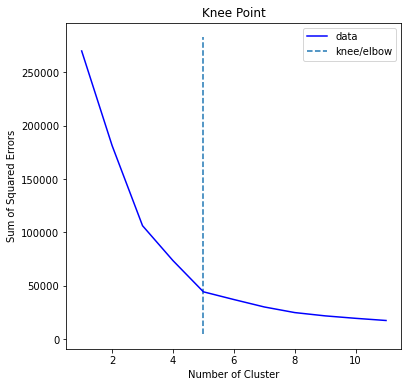

In [25]:
kneed_locator.plot_knee()
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [26]:
#Ploting cluster after getting optimal number
kmeans_optimal=KMeans(n_clusters=optimal_cluster)
df['New_Cluster']=kmeans_optimal.fit_predict(df[['income','score']])

In [27]:
df.head()

,income,score,cluster,New_Cluster
0,15,39,4,4
1,15,81,0,2
2,16,6,4,4
3,16,77,0,2
4,17,40,4,4


In [28]:
df=df.drop(['cluster'],axis=1)

In [29]:
center=kmeans_optimal.cluster_centers_
center

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

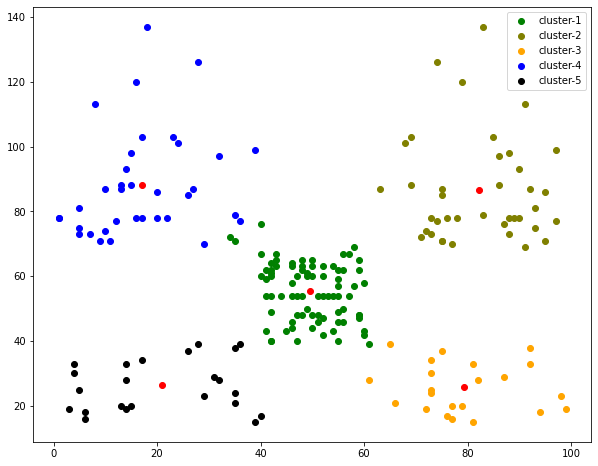

In [32]:
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]
df4 = df[df.New_Cluster == 3]
df5 = df[df.New_Cluster == 4]


plt.figure(figsize=(10,8))

plt.scatter(df1['score'],df1['income'],color='green',label='cluster-1')
plt.scatter(df2['score'],df2['income'],color='olive',label='cluster-2')
plt.scatter(df3['score'],df3['income'],color='orange',label='cluster-3')
plt.scatter(df4['score'],df4['income'],color='blue',label='cluster-4')
plt.scatter(df5['score'],df5['income'],color='black',label='cluster-5')

plt.scatter(center[:,1],center[:,0], color='red')

plt.legend()
plt.show()